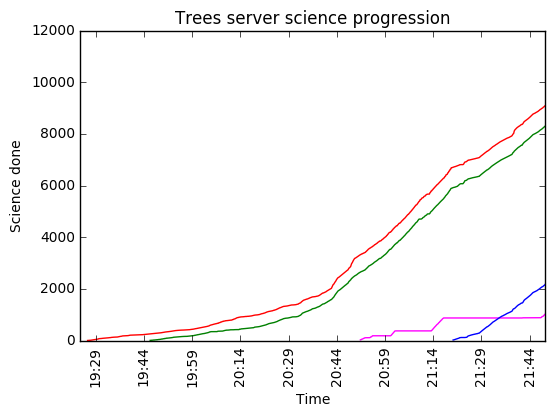

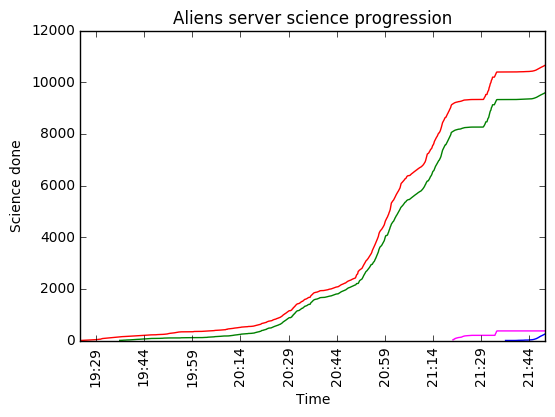

In [150]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import date2num
from datetime import timedelta

SERVER_DATA = {}
SERVER_DATA["2"] = {'name': "Aliens"}
SERVER_DATA["1"] = {'name': "Trees"}

for server in range(1,3):
    statlist = {}
    timelist = {}

    for key in ['science-pack-1', 'science-pack-2', 'science-pack-3', 'alien-science-pack']:
        statlist[key] = []
        timelist[key] = []
        for stat in ConsumptionStat.objects.filter(server__id=server).filter(key=key).order_by('time'):
            statlist[key].append(stat.value)
            timelist[key].append(stat.time + timedelta(hours=2))

    plotargs = []
    for key in statlist:
        plotargs.append(timelist[key])
        plotargs.append(statlist[key])

    lines = plt.plot(*plotargs)

    c = ['magenta', 'g', 'b', 'r']
    i=0
    for line in lines:
        plt.setp(line, color=c[i])
        i += 1


    plt.title("%s server science progression" % (SERVER_DATA[str(server)]['name'],))
    formatter = DateFormatter('%H:%M')
    plt.gcf().axes[0].xaxis.set_major_formatter(formatter)  
    plt.ylim([0,12000])
    plt.xlim((ConsumptionStat.objects.filter(key='science-pack-1').filter(value__gte=1).order_by('time').first().time + timedelta(hours=2)))
    plt.ylabel('Science done')
    plt.xlabel('Time')
    plt.xticks(rotation='vertical')
    plt.show()

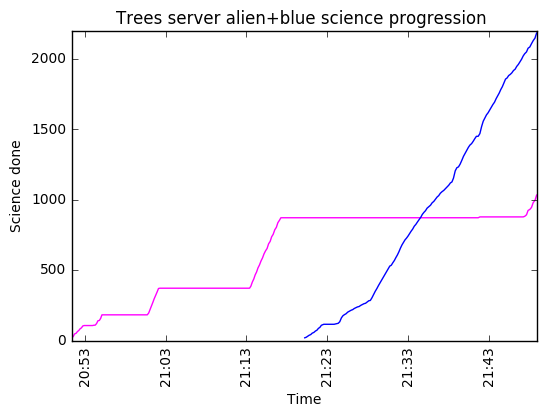

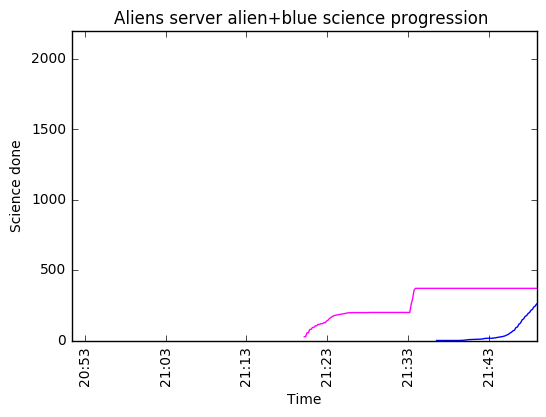

In [148]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import date2num
from datetime import timedelta

SERVER_DATA = {}
SERVER_DATA["2"] = {'name': "Aliens"}
SERVER_DATA["1"] = {'name': "Trees"}

for server in range(1,3):
    statlist = {}
    timelist = {}

    for key in ['science-pack-3', 'alien-science-pack']:
        statlist[key] = []
        timelist[key] = []
        for stat in ConsumptionStat.objects.filter(server__id=server).filter(key=key).order_by('time'):
            statlist[key].append(stat.value)
            timelist[key].append(stat.time + timedelta(hours=2))

    plotargs = []
    for key in statlist:
        #line = plt.plot(statlist[key], date2num(timelist[key]))
        #plt.setp(line, color=COLORS[key])
        plotargs.append(timelist[key])
        plotargs.append(statlist[key])

    lines = plt.plot(*plotargs)

    c = ['magenta', 'b']
    i=0
    for line in lines:
        plt.setp(line, color=c[i])
        i += 1


    plt.title("%s server alien+blue science progression " % (SERVER_DATA[str(server)]['name'],))
    formatter = DateFormatter('%H:%M')
    plt.gcf().axes[0].xaxis.set_major_formatter(formatter)  
    plt.xlim((ConsumptionStat.objects.filter(key='alien-science-pack').filter(value__gte=1).order_by('time').first().time + timedelta(hours=2)))
    plt.ylim([0,2200])
    plt.ylabel('Science done')
    plt.xlabel('Time')
    plt.xticks(rotation='vertical')
    plt.show()

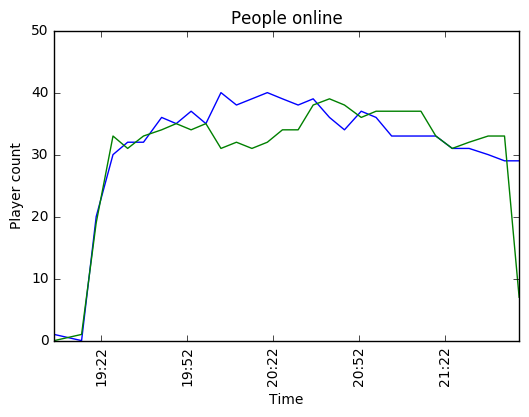

In [171]:
from django.db.models import Q
from datetime import timedelta

pl_online = {}
pl_online['1'] = 0
pl_online['2'] = 0
event_list = Event.objects.filter(Q(event=Event.EVENT_PLAYER_JOINED) | Q(event=Event.EVENT_PLAYER_LEFT)).order_by('time')

curr_time = (event_list[0].time - timedelta(hours=1))

plot_server_1 = []
plot_server_2 = []
plot_time = []

for event in event_list:
    if event.event == Event.EVENT_PLAYER_JOINED:
        pl_online[str(event.server.id)] += 1
    elif event.event == Event.EVENT_PLAYER_LEFT:
        pl_online[str(event.server.id)] -= 1
        
    if event.time > curr_time + timedelta(minutes=5):
        curr_time = event.time
        plot_time.append((event.time) + timedelta(hours=2))
        plot_server_1.append(pl_online['1'])
        plot_server_2.append(pl_online['2'])
        

lines = plt.plot(plot_time, plot_server_1, plot_time, plot_server_2)

plt.title("People online")
formatter = DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)  
plt.ylim([0,50])
plt.ylabel('Player count')
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.show()

